In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
np.random.seed(1234)

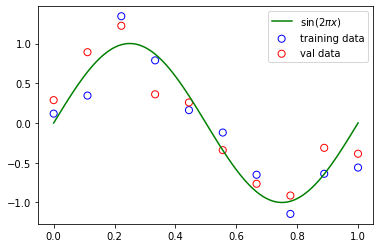

In [13]:
def create_toy_data(func, sample_size, std):
    x = np.linspace(0, 1, sample_size)
    t = func(x) + np.random.normal(scale=std, size=x.shape)
    return x, t

def func(x):
    return np.sin(2 * np.pi * x)

x_train, y_train = create_toy_data(func, 10, 0.25)
x_test = np.linspace(0, 1, 100)
y_test = func(x_test)
x_val, y_val = create_toy_data(func, 10, 0.25)
plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.scatter(x_val, y_val, facecolor="none", edgecolor="r", s=50, label="val data")
plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
plt.legend()
plt.show()


1. sample thêm 10 điểm dữ liệu cho tập valdiation
2. fit 3 model đa thức (bậc 1, bậc 3, bậc 9) cho dữ liệu trên, đánh giá mức độ underfitting, overfitting của 3 model và tính loss train/val.
3. thêm 100 dữ liệu vào tập train, model bậc 9 có còn overfitting.
4. chỉ dùng 10 dữ liệu cho tập train, fil model bậc 9 và dùng rigde regression để giảm overfitting

2. Fit 3 model da thuc (bac 1, bac 3, bac 9) cho du lieu tren, danh gia muc do underfitting, overfiting, tinhs loss train/val

In [14]:
def add_col_1(X):
  import numpy as np
  one = np.ones((len(X),1))
  X = np.concatenate((one, X), axis = 1 )
  return X

def he_so_w(X,t):
  import numpy as np
  X_T = np.transpose(X)
  w = np.linalg.inv(X_T.dot(X)).dot(X_T).dot(t)
  return w
def dudoany(x,w):
  i = len(w)
  a = 0 
  for j in range(0,i):
    a += w[j,0] * x**j
  return a

def mse(t, predict_y):
  import numpy as np 
  return np.mean((predict_y-t)**2)

[[ 0.82514962]
 [-1.58975474]]


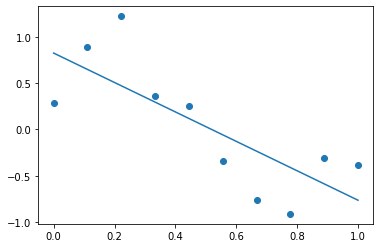

In [15]:
dt_val = np.vstack(x_val)
dt_val = add_col_1(dt_val)
y_val1 = np.vstack(y_val)
w1 = he_so_w(dt_val, y_val1)
print(w1)
plot = plt.scatter(x_val, y_val)
y_predict = dudoany(x_val,w1)
plt.plot(x_val,y_predict)

In [16]:
print("val", mse(y_val,y_predict))
print("train", mse(y_train, dudoany(x_train,w1)))

val 0.17671134464447244
train 0.23539404521934437


[[  0.39095282]
 [  6.35134139]
 [-21.8298531 ]
 [ 14.92028268]]


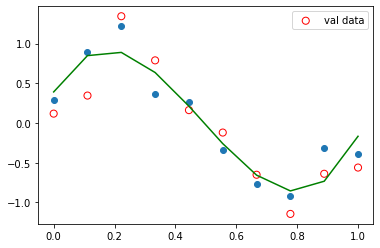

In [17]:
#  bac 3: 
y_val1 = np.vstack(y_val)
dt3 = {'x_val': x_val}
dt3 = pd.DataFrame(dt3)
dt3['x^2'] = dt3['x_val'] ** 2
dt3['x^3'] = dt3['x_val'] **3
dt3 = dt3.to_numpy()
dt3 = np.vstack(dt3)
dt3 = add_col_1(dt3)
w3 = he_so_w(dt3,y_val1)
print(w3)
plot = plt.scatter(x_val, y_val)
y_predict = dudoany(x_val,w3)
plt.plot(x_val,y_predict,'g')
plt.scatter(x_train,y_train, facecolor="none", edgecolor="r", s=50, label="val data")
plt.legend()

In [18]:
print("val", mse(y_val,y_predict))
print("train", mse(y_train, dudoany(x_train,w3)))

val 0.044885441714595575
train 0.08266111227859763


In [19]:
# resgression
def tao_ham_bac_x(dt, x):
  import numpy as np
  for i in range(2,x+1):
    dt[i] = dt.iloc[:,0] **i 
  dt = dt.to_numpy()
  dt = np.vstack(dt)
  return dt
def hesow(X, t,lamda):
  import numpy as np 
  X_T =  np.transpose(X)
  w = np.linalg.inv(X_T.dot(X) + lamda*np.identity(len(X))).dot(X_T).dot(t)
  return w  
def predict(w, number):
  import numpy as np
  a = len(w)
  sum = 0 
  for i in range(a):
    sum += w[i,0] * number**i
  return sum

# def so_sanh_lamda()
def mse_loss(y_predict,y, lamda, w):
  import numpy as np 
  return np.mean((y_predict - y)**2) + np.sum(w**2)

In [20]:
# bậc 9 
# chỉ dùng 10 dữ liệu cho tập train, fil model bậc 9 và dùng rigde regression để giảm overfitting
y_val1 = np.vstack(y_val)
y_train1 = np.vstack(y_val)
dt9 = {'x_val': x_val}
dt9 = pd.DataFrame(dt9)
dt9 = tao_ham_bac_x(dt9,9)
dt9 = add_col_1(dt9)
dt9


array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.11111111e-01, 1.23456790e-02, 1.37174211e-03,
        1.52415790e-04, 1.69350878e-05, 1.88167642e-06, 2.09075158e-07,
        2.32305731e-08, 2.58117479e-09],
       [1.00000000e+00, 2.22222222e-01, 4.93827160e-02, 1.09739369e-02,
        2.43865264e-03, 5.41922810e-04, 1.20427291e-04, 2.67616202e-05,
        5.94702672e-06, 1.32156149e-06],
       [1.00000000e+00, 3.33333333e-01, 1.11111111e-01, 3.70370370e-02,
        1.23456790e-02, 4.11522634e-03, 1.37174211e-03, 4.57247371e-04,
        1.52415790e-04, 5.08052634e-05],
       [1.00000000e+00, 4.44444444e-01, 1.97530864e-01, 8.77914952e-02,
        3.90184423e-02, 1.73415299e-02, 7.70734663e-03, 3.42548739e-03,
        1.52243884e-03, 6.76639485e-04],
       [1.00000000e+00, 5.55555556e-01, 3.08641975e-01, 1.71467764e-01,
   

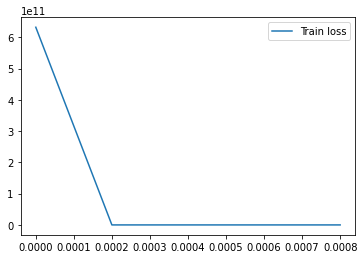

In [21]:
# L_val = {}
L_train = {}
for i in np.arange(0, 0.001, 0.0002):
  w = hesow(dt9, y_val1,i)
  # L_val[i] = mse_loss(predict(w,x_val),y_val1,i,w)
  L_train[i] = mse_loss(predict(w,x_train),y_train1,i,w)
# plt.plot(list(L_val.keys()),list(L_val.values()),  label = 'Val loss')
plt.plot(list(L_train.keys()),list(L_train.values()), label = 'Train loss')
plt.legend()

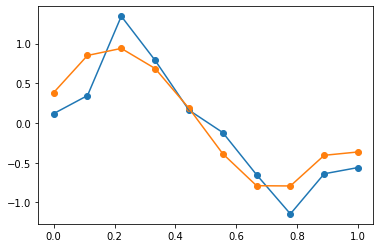

In [22]:
lamda = 0.0002 
w_update = hesow(dt9,y_val1,0.0002)
y_predict = predict(w_update, x_train)
plt.scatter(x_train,y_train)
plt.scatter(x_train,y_predict)
plt.plot(x_train,y_train)
plt.plot(x_train,y_predict)


In [23]:
w9 = he_so_w(dt9,y_val1)
w9

array([[ 2.87650600e-01],
       [-1.36256350e+02],
       [ 3.17755213e+03],
       [-2.73943912e+04],
       [ 1.22083385e+05],
       [-3.16255774e+05],
       [ 4.94939631e+05],
       [-4.61515961e+05],
       [ 2.36124194e+05],
       [-5.10230535e+04]])

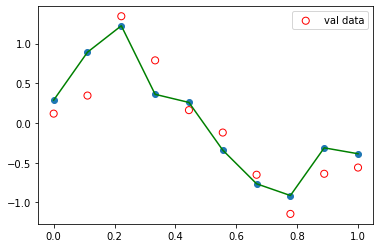

In [24]:
plot = plt.scatter(x_val, y_val)
y_predict = dudoany(x_val,w9)
plt.plot(x_val,y_predict,'g')
plt.scatter(x_train,y_train, facecolor="none", edgecolor="r", s=50, label="val data")
plt.legend()

In [25]:
print("val", mse(y_val,y_predict))
print("train", mse(y_train, dudoany(x_train,w9)))

val 9.462019185202512e-09
train 0.07848796446322828


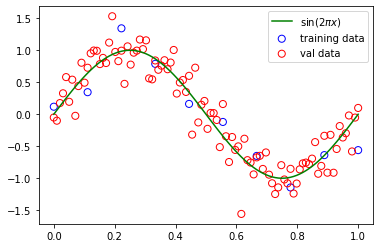

In [26]:
# thêm 100 dữ liệu vào tập train, model bậc 9 có còn overfitting.
x_val, y_val = create_toy_data(func, 100, 0.25)

plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.scatter(x_val, y_val, facecolor="none", edgecolor="r", s=50, label="val data")
plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
plt.legend()
plt.show()

In [27]:
# thêm 100 dữ liệu thì model k bị over nữa 
y_val1 = np.vstack(y_val)
dt9 = {'x_val': x_val}
dt9 = pd.DataFrame(dt9)
dt9['x^2'] = dt9['x_val'] **2
dt9['x^3'] = dt9['x_val'] **3
dt9['x^4'] = dt9['x_val'] **4
dt9['x^5'] = dt9['x_val'] **5
dt9['x^6'] = dt9['x_val'] **6
dt9['x^7'] = dt9['x_val'] **7
dt9['x^8'] = dt9['x_val'] **8
dt9['x^9'] = dt9['x_val'] **9
dt9 = dt9.to_numpy()
dt9 = np.vstack(dt9)

In [28]:
dt9 = add_col_1(dt9)
w9 = he_so_w(dt9,y_val1)
w9

array([[-2.56669595e-02],
       [ 5.45662675e+00],
       [ 6.52603525e+01],
       [-7.43885553e+02],
       [ 3.18819522e+03],
       [-7.47737344e+03],
       [ 9.99405518e+03],
       [-7.34881185e+03],
       [ 2.63521150e+03],
       [-3.18059786e+02]])

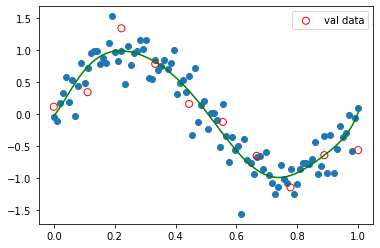

In [29]:
plot = plt.scatter(x_val, y_val)
y_predict = dudoany(x_val,w9)
plt.plot(x_val,y_predict,'g')
plt.scatter(x_train,y_train, facecolor="none", edgecolor="r", s=50, label="val data")
plt.legend()

In [30]:
print("val", mse(y_val,y_predict))
print("train", mse(y_train, dudoany(x_train,w9)))

val 0.05530427978875796
train 0.08007989411277139
